# Notebook for Topic 2 - Models

<hr style="border-top: 1px solid #001a79;" />

## Exercise 1

Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

In [1]:
# Import all used libraries

# Numpy for numerical arrays
import numpy as np

# matplotlib for plots
import matplotlib.pyplot as plt

# Optimization
import scipy.optimize as so

#### Plot absolute value function

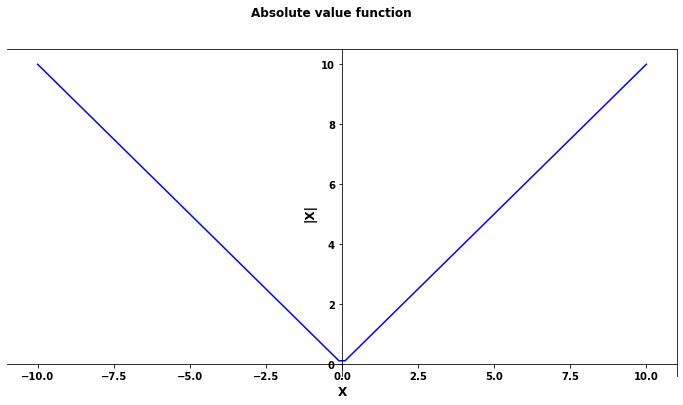

In [2]:
# Create a plot to visualize Data Set 1 with 2nd degree polynomial fit 
fig, ax = plt.subplots(figsize=(12,6))

# create x values for plot
x = np.linspace(-10, 10, 100)


fig.suptitle("Absolute value function")

# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('|X|', fontsize=12)

# X and Y axis default position moved as per https://stackoverflow.com/questions/25689238/show-origin-axis-x-y-in-matplotlib-plot
# set the x-spine
ax.spines['left'].set_position('zero')

# set the y-spine
ax.spines['bottom'].set_position('zero')


# Plot Data Set 1 points:
ax.plot(x, np.abs(x), 'b-', label="Absolute value function");

Absolute value function used for calculating Mean Absolute Error in Machine Learning Regression:

https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3


Blog about cost functions for fitting a straight line:
https://towardsdatascience.com/the-world-of-cost-functions-inclusivity-majoritarianism-and-oligarchy-51362b8b91f4

<hr style="border-top: 1px solid #001a79;" />

## Exercise 2

Fit a straight line to the following data points, using all three methods used above.

Do you think a straight line is a good model for these points?

In [3]:
# Define sample data set as a NumPy arrays
x = np.array([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0])
y = np.array([0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1])

#### Visualise the points on the scatter plot

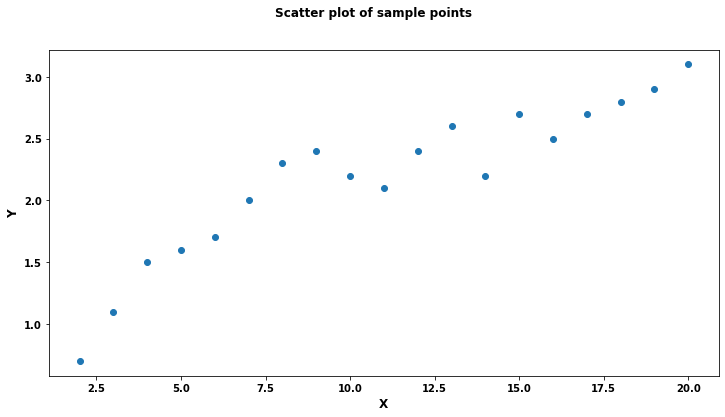

In [4]:
# Create a scatter plot to visualize the sample data
fig, ax = plt.subplots(figsize=(12,6))

fig.suptitle("Scatter plot of sample points")

# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('Y', fontsize=12)


# Plot Data Set 1 points:
ax.scatter(x, y, label="Sample points");

### SciPy 

In [5]:
# Define 2 cost function: MSE (Mean Square Error) and MAE (Mean Absolute Error)

def mse(params):
    # unpack the parameters
    a, b = params
    # calculate the Mean Square Erorr cost
    cost = np.sum( (y - a*x- b)**2 )
    # return the cost
    return cost

def mae(params):
    # unpack the parameters
    a, b = params
    # calculate the Mean Absolute Erorr cost
    cost = np.sum( np.abs(y - a*x- b) )
    # return the cost
    return cost

In [6]:
# test the cost functions
print(mse((1/7, .2)))
print(mae((1/7, .2)))

5.17530612244898
7.8714285714285745


In [7]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
result_mse = so.minimize(mse, (1/7, .2))
a_mse, b_mse = result_mse.x

print("Parameters calculated using Mean Square Error as a cost function: a={:.4}, b={:.4}\n".format(a_mse, b_mse))
print(result_mse)

Parameters calculated using Mean Square Error as a cost function: a=0.1032, b=1.049

      fun: 1.0395789473691308
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([2.98023224e-08, 5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([0.10315786, 1.04947407])


In [8]:
result_mae = so.minimize(mae, (1/7, .2))
a_mae, b_mae = result_mae.x

print("Parameters calculated using Mean Square Error as a cost function: a={:.4}, b={:.4}\n".format(a_mae, b_mae))
print(result_mae)

Parameters calculated using Mean Square Error as a cost function: a=0.09308, b=1.135

      fun: 3.272327653588931
 hess_inv: array([[ 3.49193726e-05, -7.04126535e-05],
       [-7.04126535e-05,  1.04546621e-03]])
      jac: array([8.58964992, 0.58964992])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 222
      nit: 9
     njev: 70
   status: 2
  success: False
        x: array([0.09308191, 1.13459043])


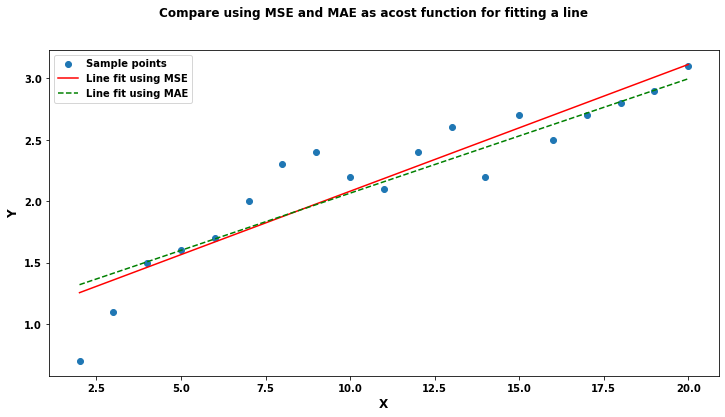

In [9]:
# Compare the scatter plot of a the sample data with 2 fitted lines
fig, ax = plt.subplots(figsize=(12,6))

fig.suptitle("Compare using MSE and MAE as acost function for fitting a line")

# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('Y', fontsize=12)


# Plot Data Set 1 points:
ax.scatter(x, y, label="Sample points");

ax.plot(x, a_mse*x+b_mse, "r-", label="Line fit using MSE")

ax.plot(x, a_mae*x+b_mae, "g--", label="Line fit using MAE")


ax.legend();

___
# End